<a href="https://colab.research.google.com/github/asab77/MAT-422/blob/main/Homework2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MLE for mu: -10.0
MLE for sigma: 0.1


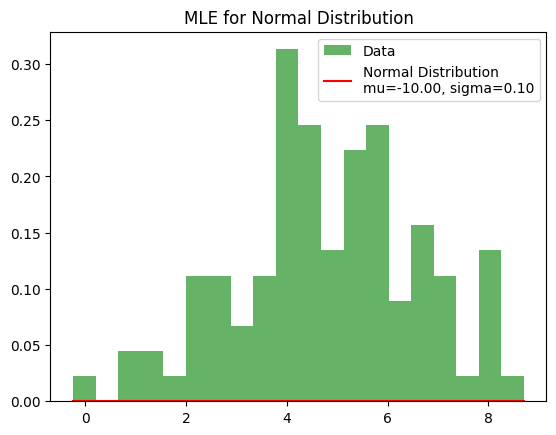

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Generating random data that follows a normal distribution with mean=5 and standard deviation=2
np.random.seed(42)
data = np.random.normal(loc=5, scale=2, size=100)

# Likelihood function for normal distribution
def negative_log(params, data):
    mu, sigma = params[0], params[1]
    n = len(data)
    log_likelihood = -np.sum(np.log(1 / (sigma * np.sqrt(2 * np.pi))) - 0.5 * ((data - mu) / sigma) ** 2)
    return -log_likelihood

# Initial guess for mu and sigma
guess = [0, 1]

# Use scipy's minimize function to find MLE for mu and sigma
result = minimize(negative_log, guess, args=(data,), bounds=[(-10, 10), (0.1, 10)])

mean_estimate, sigma_mle = result.x

print(f"MLE for mu: {mean_estimate}")
print(f"MLE for sigma: {sigma_mle}")

# Visualizing the result
plt.hist(data, bins=20, density=True, alpha=0.6, color='g', label='Data')
x = np.linspace(min(data), max(data), 1000)
pdf = (1/(sigma_mle * np.sqrt(2 * np.pi))) * np.exp(-(x - mean_estimate)**2 / (2 * sigma_mle**2))
plt.plot(x, pdf, color='r', label=f'Normal Distribution\nmu={mean_estimate:.2f}, sigma={sigma_mle:.2f}')
plt.legend()
plt.title('MLE for Normal Distribution')
plt.show()


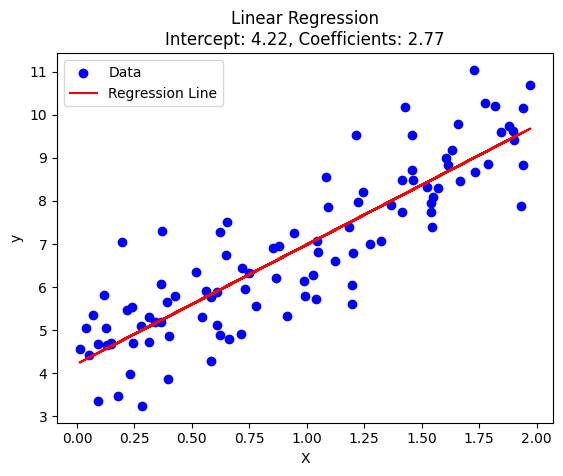

Intercept: [4.21509616]
Coefficients: [[2.77011339]]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Simulated data for linear regression
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Linear regression model
lin_regration = LinearRegression()
lin_regration.fit(X, y)

# Predict y values
y_pred = lin_regration.predict(X)

# Display the results
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.title(f'Linear Regression\nIntercept: {lin_regration.intercept_[0]:.2f}, Coefficients: {lin_regration.coef_[0][0]:.2f}')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

print(f"Intercept: {lin_regration.intercept_}")
print(f"Coefficients: {lin_regration.coef_}")
